# EDA On Zomato

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

Load Dataset & Take Overview

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\ML DS\DataSets\zomato.csv")

In [3]:
data.shape

(51717, 17)

In [4]:
data.size

879189

In [5]:
data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
22692,https://www.zomato.com/bangalore/uttara-karana...,"34, 1st Main Road, Shakambari Nagar, 1st Phase...",Uttara Karanataka Mess,No,No,3.3/5,5,+91 8746939143,JP Nagar,Mess,NaN,South Indian,200,"[('Rated 3.0', 'RATED\n Been here for some qu...",[],Delivery,JP Nagar
46172,https://www.zomato.com/bangalore/art-cafe-mall...,"Sheraton Grand, Level 4, A Block, 26/1, Dr Raj...",Art Cafe,No,No,3.5 /5,7,080 42520196,Malleshwaram,Cafe,NaN,Cafe,"1,000",[],[],Cafes,Rajajinagar
36940,https://www.zomato.com/bangalore/sagar-fast-fo...,"314/B, 20th Main, 80 Feet Road, 8th Block, Opp...",Sagar Fast Food,Yes,No,4.0 /5,138,+91 8884520900,Koramangala 8th Block,Quick Bites,Neer Dosa,"South Indian, North Indian, Street Food, Chinese",250,"[('Rated 4.0', ""RATED\n Sagar Fast Food is on...","['Idly Vada', 'Rava Masala Dosa', 'Rava Onion ...",Dine-out,Koramangala 7th Block
24215,https://www.zomato.com/bangalore/al-baik-tando...,"3, Income Tax Layout, Opposite HP Petrol Bunk,...",Al-Baik Tandoori Restaurant,Yes,No,3.6/5,113,+91 9986542994,Nagawara,Quick Bites,NaN,"North Indian, Chinese, Arabian, Biryani, Rolls",450,"[('Rated 5.0', 'RATED\n Halal tag is not ther...","['Chicken Fried Rice', 'Chicken Noodles', 'Ghe...",Delivery,Kalyan Nagar
49653,https://www.zomato.com/bangalore/vandana-andhr...,"2217/62/2C, Above Bank of Baroda, Doddakannall...",Vandana Andhra and Multi Cuisine,Yes,Yes,4.1 /5,491,080 49652600,Sarjapur Road,Casual Dining,"Chicken Guntur, Thali, Prawn Pepper Fry, Chick...","Andhra, Hyderabadi, Biryani, Chinese, North In...",900,"[('Rated 5.0', 'RATED\n Food served on banana...","['Tandoor Chicken', 'Chicken Chilly', 'Chicken...",Dine-out,Sarjapur Road


In [6]:
# Statistical Info
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Check Out Dataset Unique Values
data.apply(lambda x :len(x.unique()))

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              65
votes                           2328
phone                          14927
location                          94
rest_type                         94
dish_liked                      5272
cuisines                        2724
approx_cost(for two people)       71
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

Data Cleaning 

In [9]:
#Null Values
data.isnull().sum()/data.shape[0]*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [10]:
# Get null features
nun_feature=[feature for feature in data.columns if data[feature].isnull().sum()>0]
nun_feature

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [11]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].mode()[0])

In [12]:
data['cuisines']=data['cuisines'].fillna(data['cuisines'].mode()[0])
data['location']=data['location'].fillna(data['location'].mode()[0])
data['rest_type']=data['rest_type'].fillna(data['rest_type'].mode()[0])

In [13]:
data.dropna(axis="index",subset=["rate"],inplace=True)

In [14]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                          0
dish_liked                     20333
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [15]:
def split(x):
    return x.split('/')[0]
data['rate']=data['rate'].apply(split)
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [16]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [17]:
data.replace(['NEW','-'],0,inplace=True)

In [18]:
data.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [19]:
data['rate']=data['rate'].astype('float')

EDA

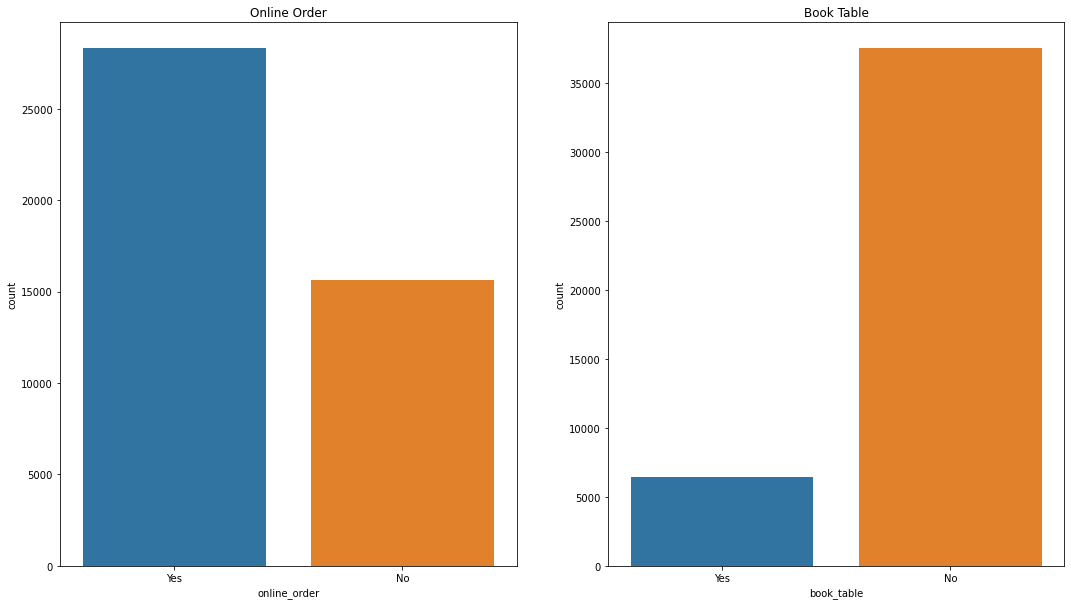

In [20]:
fig , (ax1,ax2)=plt.subplots(ncols=2,figsize=(18,10))
sns.countplot(data['online_order'],ax=ax1)
ax1.set(title='Online Order')
sns.countplot(data['book_table'],ax=ax2)
ax2.set(title='Book Table')
plt.show()

<AxesSubplot:xlabel='name'>

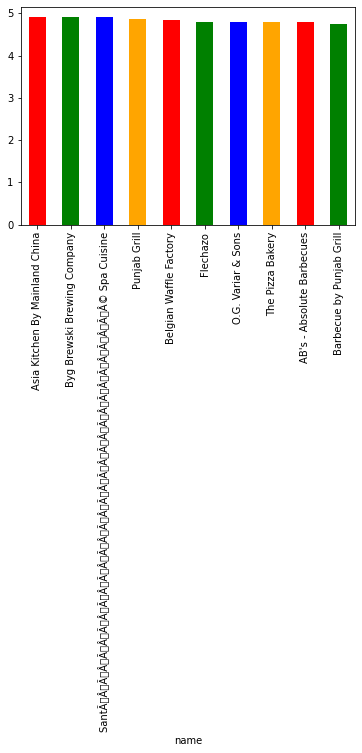

In [21]:
data.groupby('name')['rate'].mean().nlargest(10).plot.bar(color=['r','g','b','orange'])

<AxesSubplot:xlabel='name'>

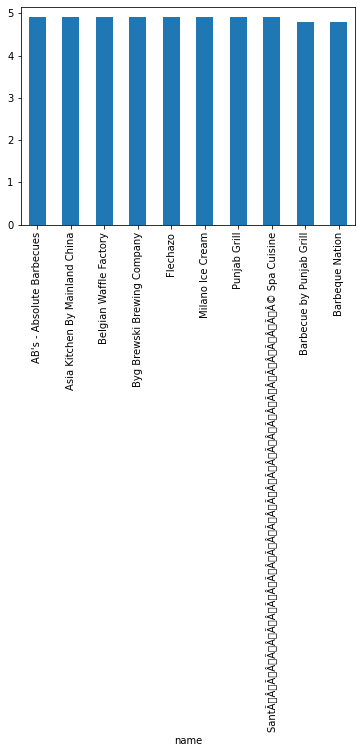

In [22]:
data.groupby('name')['rate'].max().nlargest(10).plot.bar()

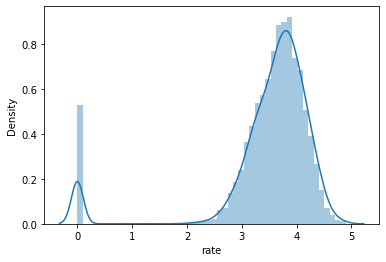

In [23]:
# Distribution Of Rating 
sns.distplot(data['rate'])
plt.show()

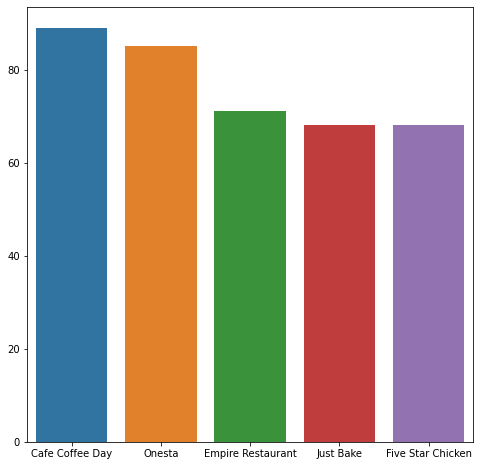

In [24]:
# Top Restaurent Chain In Banglore
data['name'].value_counts().nlargest(5)

val2=list(data['name'].value_counts().head())
val1=list(data['name'].value_counts().head().keys())
plt.figure(figsize=(8,8))
sns.barplot(val1,val2)
plt.show()

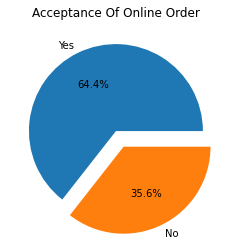

In [67]:
#Acceptance Of online Order

x=list(data['online_order'].value_counts().keys())
y=list(data['online_order'].value_counts())

plt.pie(y,labels=x,autopct='%1.1f%%',explode=[0.0,0.2])
plt.title('Acceptance Of Online Order')

plt.show()

#59 % Restaurant Take Online Order

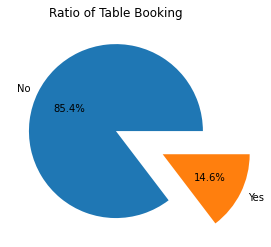

In [66]:
# Ratio between Restaurant Provide Table Booking 

x=list(data['book_table'].value_counts().keys())
y=list(data['book_table'].value_counts())

plt.pie(y,labels=x,explode=[0.0,0.6],autopct="%1.1f%%")
plt.title('Ratio of Table Booking')
plt.show()

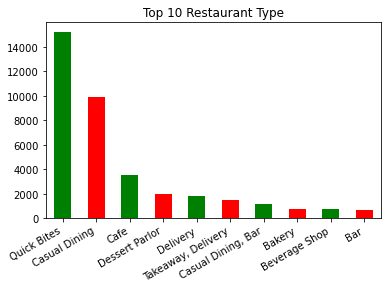

In [65]:
# x=list(data['rest_type'].value_counts().head(10).keys())
# y=list(data['rest_type'].value_counts().head(10))
# # sns.barplot(x,y)
# # plt.show()

data['rest_type'].value_counts().nlargest(10).plot.bar(color=['g','r'])
plt.title("Top 10 Restaurant Type")
plt.gcf().autofmt_xdate()

# Banglore is known as the tech city of india people having busy and modern life will prefer Quick Bites .
# As we can observe the Quick Bites type restaurant dominates


Text(0.5, 1.0, 'Higly Votes Restaurent')

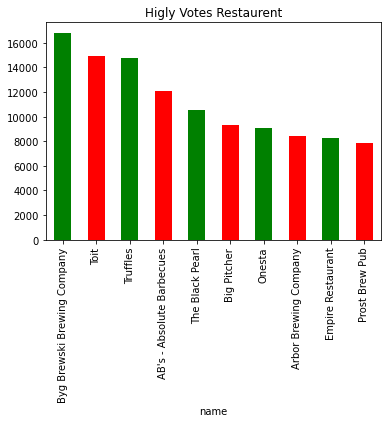

In [64]:
# data.groupby('name')["votes"].max().nlargest(10).plot.bar()

data.groupby('name')['votes'].max().nlargest(10).plot.bar(color=['g','r'])
plt.title("Higly Votes Restaurent")

Text(0.5, 1.0, 'Most Prefered Cuisine Of Banglore')

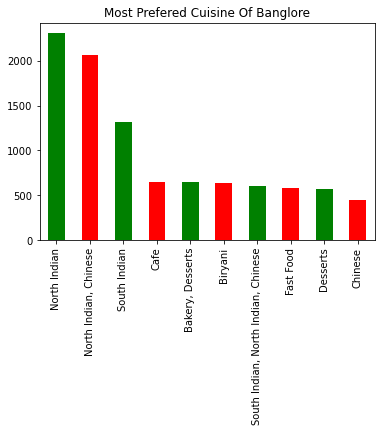

In [63]:
data['cuisines'].value_counts().nlargest(10).plot.bar(color=['g','r'])
plt.title('Most Prefered Cuisine Of Banglore')

#North Indian Cuisines Dominents the most in South india
# Banglore is more influence by north indian culture i think .

In [71]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [72]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].apply(lambda x : x.replace(',',''))

In [73]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [75]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)

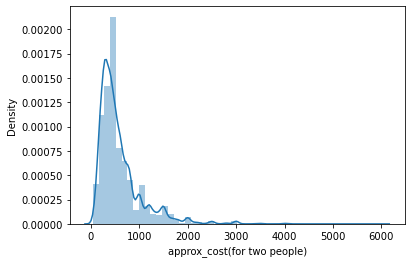

In [81]:
sns.distplot(data['approx_cost(for two people)'])
plt.show()

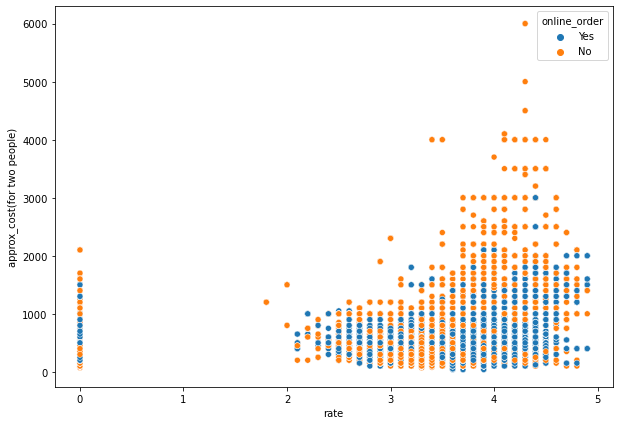

In [82]:
# Relation Between Approx Cost and Rating

plt.figure(figsize=(10,7))
sns.scatterplot(x='rate',y="approx_cost(for two people)",hue="online_order",data=data)
plt.show()

<AxesSubplot:xlabel='online_order', ylabel='votes'>

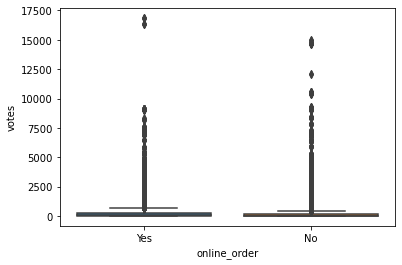

In [85]:
sns.boxplot(x="online_order",y="votes",data=data)

# from this boxplot we can observe that meadian number of votes for both categories
# Restaurant accepting online orders get more votes from customer there is a rating option pop on zomato aap

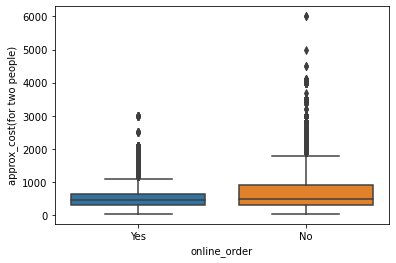

In [88]:
sns.boxplot(data=data,x='online_order',y="approx_cost(for two people)")
plt.show()

In [96]:
# Cheapest And Expensive Restaurant In Banglore
data[data['approx_cost(for two people)']==data['approx_cost(for two people)'].min()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5270,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,129,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', ""RATED\n Love their masala dos...","['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Brigade Road
12232,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,129,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', ""RATED\n Love their masala dos...","['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Church Street
14819,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,131,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n Affordable price. If ...","['2 Idly and 1 Vada', 'Rice Bath', 'Poori', 'M...",Delivery,Frazer Town
17773,https://www.zomato.com/bangalore/srinidhi-saga...,"4, 19th Main Road, 6th Cross, Kodihalli, Old A...",Srinidhi Sagar,Yes,No,3.9,160,080 25219337,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n Ordered vada sambhar ...",[],Delivery,Indiranagar
18891,https://www.zomato.com/bangalore/srinidhi-saga...,"68, Appareddy Palya, Near ESI Hospital, HAL 2n...",Srinidhi Sagar Food Line,Yes,No,3.7,129,080 25250408,Indiranagar,Quick Bites,"Vada, Masala Dosa, Filter Coffee","South Indian, North Indian, Chinese",40,"[('Rated 4.0', ""RATED\n Love their masala dos...",[],Dine-out,Indiranagar
27091,https://www.zomato.com/bangalore/srinidhi-saga...,"412, Seventh Cross, Domlur, Bangalore",Srinidhi Sagar Deluxe,Yes,No,3.6,108,080 25354689,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n whenever I get up lat...",[],Delivery,Koramangala 4th Block
29785,https://www.zomato.com/bangalore/srinidhi-saga...,"412, Seventh Cross, Domlur, Bangalore",Srinidhi Sagar Deluxe,Yes,No,3.6,108,080 25354689,Domlur,Quick Bites,"Idli, Coffee, Masala Dosa, Fruit Juices, Vada,...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n whenever I get up lat...","['Paneer Butter Masala', 'Curd Rice', 'Veg Pul...",Delivery,Koramangala 5th Block
32485,https://www.zomato.com/bangalore/srinidhi-saga...,"4, 19th Main Road, 6th Cross, Kodihalli, Old A...",Srinidhi Sagar,Yes,No,3.9,162,080 25219337,Old Airport Road,Quick Bites,"Masala Dosa, Rava Dosa, Rava Idli, Filter Coff...","South Indian, North Indian, Chinese",40,"[('Rated 4.0', 'RATED\n Ordered vada sambhar ...",[],Delivery,Koramangala 6th Block


In [97]:
data[data['approx_cost(for two people)']==data['approx_cost(for two people)'].max()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


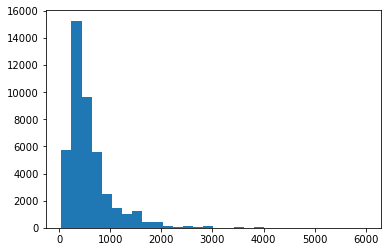

In [100]:
plt.hist(data["approx_cost(for two people)"],bins=30)
plt.show()

<AxesSubplot:>

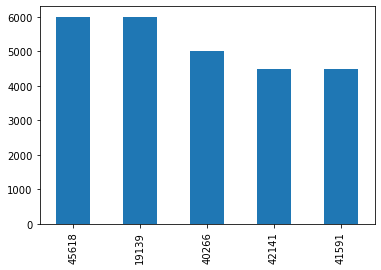

In [104]:
#High Rate Restaurant
#data['approx_cost(for two people)'].nlargest(5)
data['approx_cost(for two people)'].sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:>

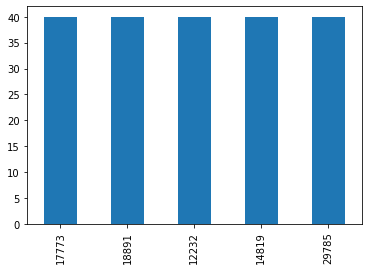

In [110]:
#Cheapest Restaurant
data['approx_cost(for two people)'].sort_values().head(5).plot.bar()